In [1]:
# import the modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


### Load the dataset

- Load the train data and using all your knowledge of pandas try to explore the different statistical properties of the dataset.

In [2]:
# read the dataset and extract the features and target separately
train_data = pd.read_csv(r'C:\Users\kamlesh\Downloads\machine learing\train.csv')
submission_data = pd.read_csv(r'C:\Users\kamlesh\Downloads\machine learing\sample_submission.csv')

In [3]:
train_data.dtypes

Id               int64
Name            object
Age              int64
Nationality     object
Overall          int64
Potential        int64
Club            object
Value (M)      float64
Wage (M)       float64
Position        object
dtype: object

In [4]:
train_data.isna().sum()

Id               0
Name             0
Age              0
Nationality      0
Overall          0
Potential        0
Club           211
Value (M)        0
Wage (M)         0
Position         0
dtype: int64

In [5]:
train_data = train_data.fillna("Unknown")

In [6]:
train_data.isna().sum()

Id             0
Name           0
Age            0
Nationality    0
Overall        0
Potential      0
Club           0
Value (M)      0
Wage (M)       0
Position       0
dtype: int64

In [7]:
train_data.describe().loc[['min','max']]

,Id,Age,Overall,Potential,Value (M),Wage (M)
min,0.0,16.0,46.0,46.0,0.0,0.000
max,17980.0,47.0,94.0,94.0,105.0,0.565


In [8]:
train_data.head(5)

,Id,Name,Age,Nationality,Overall,Potential,Club,Value (M),Wage (M),Position
0,17221,F. Burdenski,25,Germany,54,58,Korona Kielce,0.07,0.001,CDM
1,11353,A. Deiola,21,Italy,64,73,Cagliari,0.70,0.010,CM
2,3402,T. Castagne,21,Belgium,72,79,Atalanta,3.70,0.013,RB
3,16071,D. Gorman,21,Northern Ireland,57,66,Stevenage,0.16,0.002,CM
4,12380,N. Molina Lucero,19,Argentina,63,75,Boca Juniors,0.55,0.002,LB


### Visualize the data

- Check for the categorical & continuous features. 
- Check out the best plots for plotting between categorical target and continuous features and try making some inferences from these plots.
- Check for the correlation between the features

In [9]:
sns.set_style("whitegrid")

<AxesSubplot:xlabel='Club', ylabel='Age'>

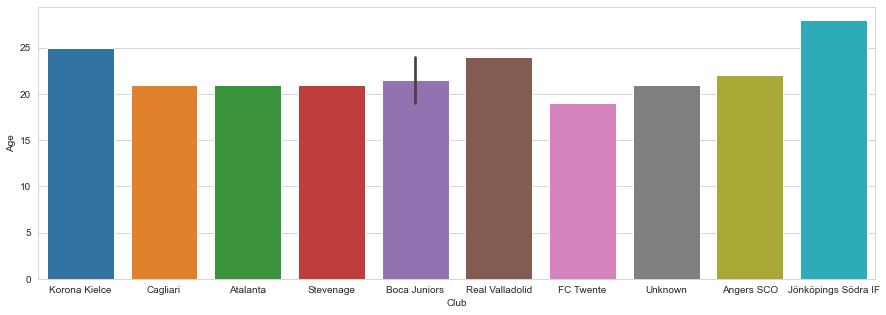

In [10]:
plt.figure(figsize=(15,5))
sns.barplot(x='Club', y='Age', data= train_data.loc[0:10])

In [11]:
# Code Starts here
Numeric_cols = ['Id','Age','Overall','Potential','Wage (M)']
Categorical_cols = ['Name','Nationality','Club','Position']

from sklearn.preprocessing import  LabelEncoder
le = LabelEncoder()

le.fit(train_data['Name'])
train_data['Name']=le.transform(train_data['Name'])
le.fit(train_data['Nationality'])
train_data['Nationality']=le.transform(train_data['Nationality'])
le.fit(train_data['Club'])
train_data['Club']=le.transform(train_data['Club'])
le.fit(train_data['Position'])
train_data['Position']=le.transform(train_data['Position'])
# Code ends here

<AxesSubplot:>

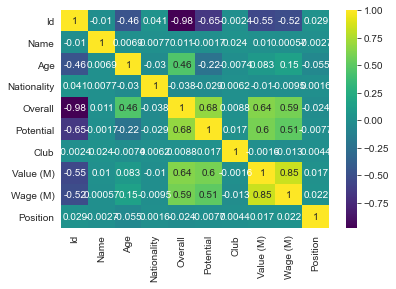

In [12]:
corr = train_data.corr()
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, annot = True, cmap= 'viridis')

### Model building

- Separate the features and target and then split the train data into train and validation set.
- Now let's come to the actual task, using linear regression, predict the `Value (M)`. 
- Try improving upon the `r2_score` (R-Square) using different parameters that give the best score. You can use higher degree [Polynomial Features of sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) to improve the model prediction. 



In [13]:
# Code Starts here
X = train_data.drop(['Value (M)'],axis=1)
y = train_data['Value (M)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print("r2", r2)

mae = mean_squared_error(y_test, y_pred)
print("mae", mae)


from sklearn.preprocessing import PolynomialFeatures

ploy = PolynomialFeatures(4)
X_train_2 = ploy.fit_transform(X_train)
X_test_2 = ploy.transform(X_test)

model = LinearRegression()
model.fit(X_train_2, y_train)

y_pred_2 = model.predict(X_test_2)

r2 = r2_score(y_test,y_pred_2)
print("r2", r2)

mae = mean_squared_error(y_test, y_pred_2)
print("mae", mae)
# Code ends here

r2 0.7995328796583645
mae 5.135528618563141
r2 0.9656068307365638
mae 0.8810776786460299


### Prediction on the test data and creating the sample submission file.

- Load the test data and store the `Id` column in a separate variable.
- Perform the same operations on the test data that you have performed on the train data.
- Create the submission file as a `csv` file consisting of the `Id` column from the test data and your prediction as the second column.

In [14]:
# Code Starts here

test_data = pd.read_csv(r'C:\Users\kamlesh\Downloads\machine learing\test.csv')

test_id = test_data['Id']
from sklearn.preprocessing import  LabelEncoder
le = LabelEncoder()

le.fit(test_data['Name'])
test_data['Name']=le.transform(test_data['Name'])
le.fit(test_data['Nationality'])
test_data['Nationality']=le.transform(test_data['Nationality'])
le.fit(test_data['Club'])
test_data['Club']=le.transform(test_data['Club'])
le.fit(test_data['Position'])
test_data['Position']=le.transform(test_data['Position'])



X = test_data
X_test = ploy.transform(X)

y_pred_test = model.predict(X_test)
print(y_pred_test)

# Code ends here

[22.24735315 16.9517037   1.19297097 ...  0.89112623  7.66999074
  2.57387511]


In [15]:
submission_result = pd.DataFrame(y_pred_test, index = test_id, columns = ['Value (M)'])

In [16]:
print(round(submission_result,2))

       Value (M)
Id              
280        22.25
569        16.95
8731        1.19
10085       0.10
9831        0.71
...          ...
5584        1.10
4629        1.60
6123        0.89
664         7.67
4238        2.57

[3597 rows x 1 columns]


In [17]:
submission_result.to_csv('FIFO Value Prediction.csv', index = True)